### Spam detection using the Bag of Words (BoW)

## Naive Bays Classifier
Problem St: Given an email. you have to classify them is eiether spam or no spam (ham)
=> pipeline for this problem -
 a) data
 b) data cleaning & data processing
 c) Model Trainning 
 d) Evaluation 

### Load The Dataset

In [104]:
import pandas as pd

# Adjust display settings to show all columns and the full content of each message
pd.set_option('display.max_colwidth', None)  # No truncation for message content
pd.set_option('display.max_columns', None)   # Show all columns

# Load the dataset
df = pd.read_csv('smsspamcollection/spamhamdata.csv', sep='\t', names=["label", "message"])

# Display the DataFrame
# print(df)

In [130]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [110]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


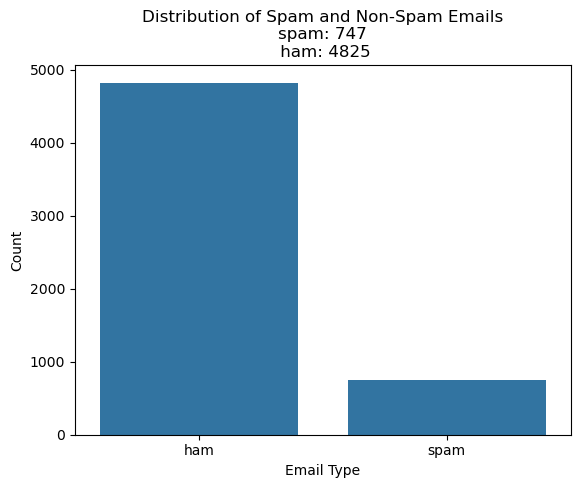

In [112]:
# Distribution spam or non spam emails 
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of spam and non-spam emails
plt.figure(figure=(6,4))
sns.countplot(x='label', data=df)
label_counts = df['label'].value_counts()
plt.title(f"Distribution of Spam and Non-Spam Emails\nspam: {label_counts.get('spam', 0)}\n ham: {label_counts.get('ham', 0)}")
# plt.title(f"Distribution of Spam and Non-Spam Emails\n {df['label'].value_counts()}")
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

### What does an imbalanced dataset mean?
An imbalanced dataset in classification tasks occurs when the classes (labels) are not represented equally. For example, if the number of non-spam emails (ham) is much higher than spam emails, the dataset is imbalanced.
Example: If your dataset has 1,000 non-spam emails and only 100 spam emails, it can be considered highly imbalanced.

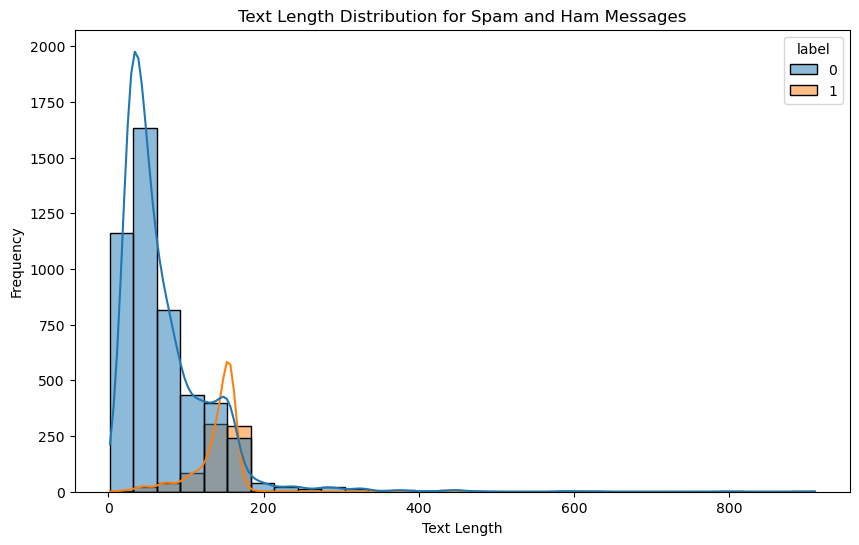

In [124]:
# Calculate the length of each message
df['text_length'] = df['message'].apply(len)

# Plot the distribution of text lengths for spam and ham messages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution for Spam and Ham Messages')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [140]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the dataset
df1 = pd.read_csv('smsspamcollection/spamhamdata.csv', sep='\t', header=None, names=["label", "message"])

# Step 2: Convert labels to a binary format
df1['label'] = df1['label'].map({'ham': 0, 'spam': 1})

# # Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=42)

# Step 4: Convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Step 5: Train a spam detection model using Naive Bayes
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test_bow)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.99
Confusion Matrix:
[[1444    4]
 [  12  212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672

